Crie um código em python que busca o ativo digitado pelo usuário, por nome ou código de listagem do mesmo, depois utilize a biblioteca yfinance para pesquisa os dados de fechamento do ativo nos ultimos 5 anos e, em seguida, crie um dataframe com dos dados obtidos, a partir dele gera um gráfico do tipo candlestick.

 ## Definição dos Requisitos
 Os requisitos funcionais básicos para este projeto
são:

*   Captura do Ativo
*   Validação do Ativo
*   Geração Dataframe
*   Geração de Gráfico de Candlestick




In [ ]:
!pip install yfinance pandas mplfinance ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=da9092488b186b89bd03311fd8258e5267940be26bcaa04d9dc0b7eea6f4547d
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


Função de gráfico candlestick
Função mapa de calor
Função taxaSelic
Função decomposição em série


Bem-vindo ao sistema de consulta de ativos B3!


Escolha uma opção:
1. EXIBIR TODOS OS ATIVOS
2. Buscar ativo pelo código
3. Sair


[*********************100%***********************]  1 of 1 completed


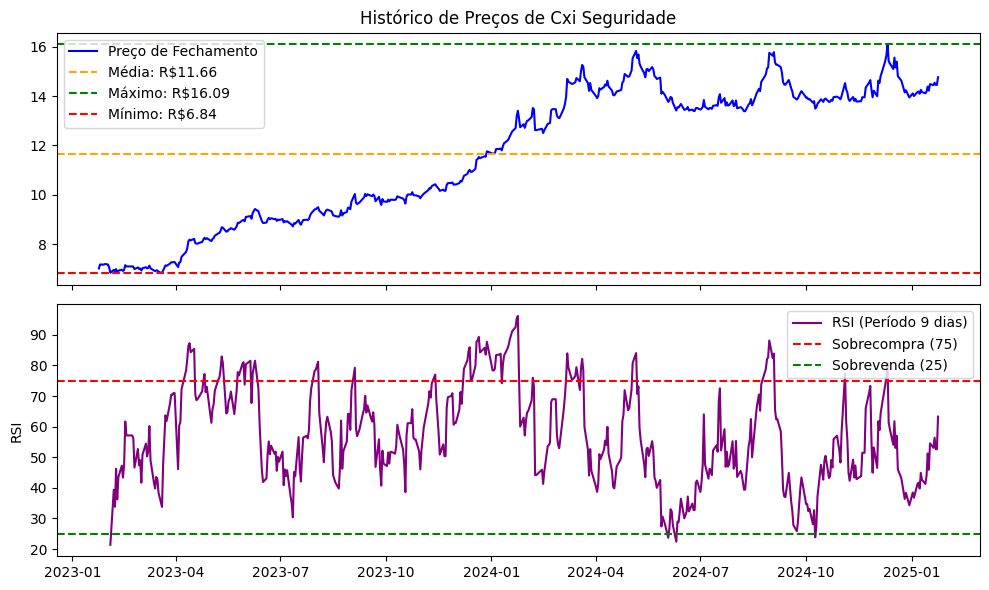


Escolha uma opção:
1. EXIBIR TODOS OS ATIVOS
2. Buscar ativo pelo código
3. Sair


In [ ]:

import pandas as pd
import numpy as np  # Importando o numpy diretamente
import matplotlib.pyplot as plt
import yfinance as yf  # Para baixar dados financeiros reais
from ta.momentum import RSIIndicator

# Dicionário de ativos
ativos_b3 = {
    "GOAU4": {"nome": "Gerdau", "setor": "Construção", "tipo": "Ação Preferencial", "code": "GOAU4"},
    "PETR4": {"nome": "Petrobras", "setor": "Petróleo, Gás e Biocombustíveis", "tipo": "Ação Preferencial", "code": "PETR4"},
    "PETR3": {"nome": "Petrobras", "setor": "Petróleo, Gás e Biocombustíveis", "tipo": "Ação Ordinária", "code": "PETR3"},
    "VALE3": {"nome": "Vale", "setor": "Mineração", "tipo": "Ação Ordinária", "code": "VALE3"},
    "GOLL4": {"nome": "GOL", "setor": "Consumo", "tipo": "Ação Preferencial", "code": "GOLL4"},
    "ITUB4": {"nome": "Itaú Unibanco", "setor": "Financeiro", "tipo": "Ação Preferencial", "code": "ITUB4"},
    "MGLU3": {"nome": "Magazine Luiza", "setor": "Consumo", "tipo": "Ação Ordinária", "code": "MGLU3"},
    "BBDC4": {"nome": "Bradesco", "setor": "Financeiro", "tipo": "Ação Preferencial", "code": "BBDC4"},
    "BBDC3": {"nome": "Bradesco", "setor": "Financeiro", "tipo": "Ação Ordinária", "code": "BBDC3"},
    "ABEV3": {"nome": "Ambev", "setor": "Bebidas", "tipo": "Ação Ordinária", "code": "ABEV3"},
    "WEGE3": {"nome": "WEG", "setor": "Bens Industriais", "tipo": "Ação Ordinária", "code": "WEGE3"},
    "ITSA4": {"nome": "Itausa", "setor": "Bens Industriais", "tipo": "Ação Preferencial", "code": "ITSA4"},
    "B3SA3": {"nome": "B3", "setor": "Bens Industriais", "tipo": "Ação Ordinária", "code": "B3SA3"},
    "BBAS3": {"nome": "Banco do Brasil", "setor": "Financeiro", "tipo": "Ação Ordinária", "code": "BBAS3"},
    "BBSE3": {"nome": "BB Seguridade", "setor": "Financeiro", "tipo": "Ação Ordinária", "code": "BBSE3"},
    "CMIG4": {"nome": "CEMIG", "setor": "Energia", "tipo": "Ação Preferencial", "code": "CMIG4"},
    "TAEE4": {"nome": "Taesa", "setor": "Construção", "tipo": "Ação Preferencial", "code": "TAEE4"},
    "LREN3": {"nome": "Lojas Renner", "setor": "Consumo", "tipo": "Ação Ordinária", "code": "LREN3"},
    "XPLG11": {"nome": "XP Logistica", "setor": "Logística", "tipo": "Fundo Imobiliário de Investimento", "code": "XPLG11"},
    "XPML11": {"nome": "XP MALL", "setor": "Logística", "tipo": "Fundo Imobiliário de Investimento", "code": "XPML11"},
    "VISC11": {"nome": "VISCONDE", "setor": "Logística", "tipo": "Fundo Imobiliário de Investimento", "code": "VISC11"},
    "BTLG11": {"nome": "BTG Pactual", "setor": "Logística", "tipo": "Fundo Imobiliário de Investimento", "code": "BTLG11"},
    "KNCR11": {"nome": "Kinea Rendimentos", "setor": "Papéis", "tipo": "Fundo Imobiliário de Investimento", "code": "KNCR11"},
    "CXSE3": {"nome": "CAIXA Seguridade", "setor": "Financeiro", "tipo": "Ação Ordinária", "code": "CXSE3"},
}

def calcular_rsi(df: pd.DataFrame, coluna: str, period: int = 9) -> pd.Series:
    """Calcula o Índice de Força Relativa (RSI)."""
    rsi = RSIIndicator(df[coluna], window=period)
    return rsi.rsi()

def plotar_fechamento_com_rsi(df: pd.DataFrame, nome_ativo: str, periodo_rsi: int):
    """Plota gráficos de fechamento e RSI."""
    try:
        preco_medio = df['Fechamento'].mean()
        preco_maximo = df['Fechamento'].max()
        preco_minimo = df['Fechamento'].min()

        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

        # Gráfico de Fechamento
        ax1.plot(df['Data'], df['Fechamento'], label='Preço de Fechamento', color='blue')
        ax1.axhline(preco_medio, color='orange', linestyle='--', label=f'Média: R${preco_medio:.2f}')
        ax1.axhline(preco_maximo, color='green', linestyle='--', label=f'Máximo: R${preco_maximo:.2f}')
        ax1.axhline(preco_minimo, color='red', linestyle='--', label=f'Mínimo: R${preco_minimo:.2f}')
        ax1.set_title(f"Histórico de Preços de {nome_ativo}")
        ax1.legend()

        # Gráfico do RSI
        ax2.plot(df['Data'], df['RSI'], label=f'RSI (Período {periodo_rsi} dias)', color='purple')
        ax2.axhline(75, linestyle='--', color='red', label='Sobrecompra (75)')
        ax2.axhline(25, linestyle='--', color='green', label='Sobrevenda (25)')
        ax2.set_ylabel("RSI")
        ax2.legend()

        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Erro ao plotar gráficos: {e}")

def exibir_ativos():
    """Exibe todos os ativos com seus detalhes."""
    for codigo, info in ativos_b3.items():
        print(f"Codigo: {codigo}")
        print(f"Nome: {info['nome']}")
        print(f"Setor: {info['setor']}")
        print(f"Tipo: {info['tipo']}")
        print("-" * 40)

def buscar_ativo(codigo):
    """Busca um ativo pelo código e gera os gráficos com dados reais."""
    ativo = ativos_b3.get(codigo)
    if ativo:
        # Entrada do usuário para o período do RSI (padrão 9)
        periodo_rsi = input("Digite o período para o cálculo do RSI (9 dias):\n ").strip()
        periodo_rsi = int(periodo_rsi) if periodo_rsi else 9  # Se o usuário não informar, o valor padrão será 14

        # Baixar dados históricos do ativo utilizando yfinance
        ticker_yf = ativo['code'] + ".SA"  # Adicionando ".SA" para obter os dados da B3
        dados = yf.download(ticker_yf, period="2y", interval="1d")  # Obtendo dados dos últimos 12 meses, diariamente

        if dados.empty:
            print(f"Não foi possível obter dados históricos para o ativo {codigo}.")
            return

        # Criando o DataFrame com a coluna 'Fechamento' (Close) e a data
        df = dados[['Close']].reset_index()
        df.columns = ['Data', 'Fechamento']

        # Calculando o RSI
        df['RSI'] = calcular_rsi(df, coluna='Fechamento', period=periodo_rsi)

        # Plotando os gráficos
        plotar_fechamento_com_rsi(df, ativo['nome'], periodo_rsi)
    else:
        print(f"Ativo {codigo} não encontrado.")

def main():
    """Função principal para interagir com o usuário e o dicionário de ativos."""
    print("Bem-vindo ao sistema de consulta de ativos B3!\n")

    while True:
        print("\nEscolha uma opção:")
        print("1. Exibir todos os ativos".upper())
        print("2. Buscar ativo pelo código")
        print("3. Sair")

        opcao = input("\nDigite o número da opção: ")

        if opcao == "1":
            exibir_ativos()
        elif opcao == "2":
            codigo = input("\nDigite o código do ativo:\n ").upper()
            buscar_ativo(codigo)
        elif opcao == "3":
            print("Saindo do sistema...")
            break
        else:
            print("Opção inválida. Tente novamente.")

if __name__ == "__main__":
    main()
